In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/metaestimators.py)

In [6]:
SA = pd.read_csv("studentAssessment.csv");
SI = pd.read_csv("studentInfo.csv");
VLE = pd.read_csv("studentVle.csv")
print(SI)

      code_module code_presentation  id_student gender                region  \
0             AAA             2013J       11391      M   East Anglian Region   
1             AAA             2013J       28400      F              Scotland   
2             AAA             2013J       30268      F  North Western Region   
3             AAA             2013J       31604      F     South East Region   
4             AAA             2013J       32885      F  West Midlands Region   
...           ...               ...         ...    ...                   ...   
32588         GGG             2014J     2640965      F                 Wales   
32589         GGG             2014J     2645731      F   East Anglian Region   
32590         GGG             2014J     2648187      F          South Region   
32591         GGG             2014J     2679821      F     South East Region   
32592         GGG             2014J     2684003      F      Yorkshire Region   

           highest_education imd_band a

In [7]:
print(VLE)

         code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]


In [8]:
print(SA)

        id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[173912 rows x 5 columns]


In [9]:
data = pd.read_csv('studentRegistration.csv');
data["module_student"] = data.code_module + data.code_presentation + data.id_student.astype(str);
data = data[~(data.date_unregistration < 0)]
print(data.shape)
data["target"] = 0.0
data.iloc[data.date_unregistration > 0, -1] = 1.0;
data.head()

(29915, 6)


,code_module,code_presentation,id_student,date_registration,date_unregistration,module_student,target
0,AAA,2013J,11391,-159.0,NaN,AAA2013J11391,0.0
1,AAA,2013J,28400,-53.0,NaN,AAA2013J28400,0.0
2,AAA,2013J,30268,-92.0,12.0,AAA2013J30268,1.0
3,AAA,2013J,31604,-52.0,NaN,AAA2013J31604,0.0
4,AAA,2013J,32885,-176.0,NaN,AAA2013J32885,0.0


In [10]:
assessments = pd.read_csv("assessments.csv");
assessments.weight = assessments.weight / 100.0;

In [11]:
print(assessments)

    code_module code_presentation  id_assessment assessment_type   date  \
0           AAA             2013J           1752             TMA   19.0   
1           AAA             2013J           1753             TMA   54.0   
2           AAA             2013J           1754             TMA  117.0   
3           AAA             2013J           1755             TMA  166.0   
4           AAA             2013J           1756             TMA  215.0   
..          ...               ...            ...             ...    ...   
201         GGG             2014J          37443             CMA  229.0   
202         GGG             2014J          37435             TMA   61.0   
203         GGG             2014J          37436             TMA  124.0   
204         GGG             2014J          37437             TMA  173.0   
205         GGG             2014J          37444            Exam  229.0   

     weight  
0       0.1  
1       0.2  
2       0.2  
3       0.2  
4       0.3  
..      ...  
2

In [12]:
# Шаг 1: Объединение SA и assessments
merged_df = pd.merge(SA, assessments, on='id_assessment')

# Шаг 2: Расчет взвешенного среднего
# Создаем новую колонку для взвешенной оценки
merged_df['weighted_score'] = merged_df['score'] * merged_df['weight']

# Группируем по нужным полям и суммируем взвешенные оценки и веса
grouped = merged_df.groupby(['id_student', 'code_module', 'code_presentation'])
weighted_scores = grouped['weighted_score'].sum()
total_weights = grouped['weight'].sum()

# Рассчитываем средневзвешенную оценку
average_scores = weighted_scores / total_weights
average_scores = average_scores.reset_index()
average_scores.rename(columns={0: 'average_score'}, inplace=True)

# Шаг 3: Объединяем с XY
result = pd.merge(data, average_scores, on=['id_student', 'code_module', 'code_presentation'], how='left')

# Шаг 4: Заполняем отсутствующие значения (-1)
result['average_score'].fillna(-1, inplace=True)
print(result)

      code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
29910         GGG             2014J     2640965               -4.0   
29911         GGG             2014J     2645731              -23.0   
29912         GGG             2014J     2648187             -129.0   
29913         GGG             2014J     2679821              -49.0   
29914         GGG             2014J     2684003              -28.0   

       date_unregistration   module_student  target  average_score  
0                      NaN    AAA2013J11391     0.0           82.4  
1                    

/var/folders/j1/q7f13qp16nz7scpqs_tyh0q80000gn/T/ipykernel_48099/2283995209.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result['average_score'].fillna(-1, inplace=True)


In [13]:
print(result)

      code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       30268              -92.0   
3             AAA             2013J       31604              -52.0   
4             AAA             2013J       32885             -176.0   
...           ...               ...         ...                ...   
29910         GGG             2014J     2640965               -4.0   
29911         GGG             2014J     2645731              -23.0   
29912         GGG             2014J     2648187             -129.0   
29913         GGG             2014J     2679821              -49.0   
29914         GGG             2014J     2684003              -28.0   

       date_unregistration   module_student  target  average_score  
0                      NaN    AAA2013J11391     0.0           82.4  
1                    

In [14]:
print(VLE)

         code_module code_presentation  id_student  id_site  date  sum_click
0                AAA             2013J       28400   546652   -10          4
1                AAA             2013J       28400   546652   -10          1
2                AAA             2013J       28400   546652   -10          1
3                AAA             2013J       28400   546614   -10         11
4                AAA             2013J       28400   546714   -10          1
...              ...               ...         ...      ...   ...        ...
10655275         GGG             2014J      675811   896943   269          3
10655276         GGG             2014J      675578   896943   269          1
10655277         GGG             2014J      654064   896943   269          3
10655278         GGG             2014J      654064   896939   269          1
10655279         GGG             2014J      654064   896939   269          1

[10655280 rows x 6 columns]


In [15]:
VLE = VLE[VLE['date'] >= 0]
VLE = VLE.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index()
print(VLE)

      code_module code_presentation  id_student  sum_click
0             AAA             2013J       11391        836
1             AAA             2013J       28400       1220
2             AAA             2013J       30268        179
3             AAA             2013J       31604       1989
4             AAA             2013J       32885        739
...           ...               ...         ...        ...
28495         GGG             2014J     2640965         39
28496         GGG             2014J     2645731        893
28497         GGG             2014J     2648187        297
28498         GGG             2014J     2679821        210
28499         GGG             2014J     2684003        501

[28500 rows x 4 columns]


In [15]:
print(acc_log_values)

NameError: name 'acc_log_values' is not defined

In [16]:
# Подсчет количества сданных ассесментов для каждого студента и курса
passed_assessments_count = merged_df.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].count().reset_index()

# Подсчет общего количества ассесментов для каждого студента и курса
total_assessments_count = assessments.groupby(['code_module', 'code_presentation'])['id_assessment'].count().reset_index()

# Слияние таблиц с количеством сданных и общим количеством ассесментов
result_df = pd.merge(passed_assessments_count, total_assessments_count, on=['code_module', 'code_presentation'], suffixes=('_passed', '_total'))

# Вычисление процента сданных ассесментов
result_df['passing_percentage'] = (result_df['id_assessment_passed'] / result_df['id_assessment_total']) * 100

merged_df = pd.merge(result, result_df, on=['id_student', 'code_module', 'code_presentation'])

print(merged_df)


      code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       31604              -52.0   
3             AAA             2013J       32885             -176.0   
4             AAA             2013J       38053             -110.0   
...           ...               ...         ...                ...   
25809         GGG             2014J     2620947              -23.0   
25810         GGG             2014J     2645731              -23.0   
25811         GGG             2014J     2648187             -129.0   
25812         GGG             2014J     2679821              -49.0   
25813         GGG             2014J     2684003              -28.0   

       date_unregistration   module_student  target  average_score  \
0                      NaN    AAA2013J11391     0.0           82.4   
1                  

In [17]:
#added VLE
merged_df = pd.merge(merged_df, VLE, on=['id_student', 'code_module', 'code_presentation'])
print(merged_df)

      code_module code_presentation  id_student  date_registration  \
0             AAA             2013J       11391             -159.0   
1             AAA             2013J       28400              -53.0   
2             AAA             2013J       31604              -52.0   
3             AAA             2013J       32885             -176.0   
4             AAA             2013J       38053             -110.0   
...           ...               ...         ...                ...   
25749         GGG             2014J     2620947              -23.0   
25750         GGG             2014J     2645731              -23.0   
25751         GGG             2014J     2648187             -129.0   
25752         GGG             2014J     2679821              -49.0   
25753         GGG             2014J     2684003              -28.0   

       date_unregistration   module_student  target  average_score  \
0                      NaN    AAA2013J11391     0.0           82.4   
1                  

In [18]:
# Произведем объединение по колонке 'id_student'
YX = merged_df[["id_student", "target","date_registration", "average_score", "passing_percentage", "id_assessment_passed", "id_assessment_total", "sum_click"]];
print(YX.shape)
for col in ["gender", "region", "age_band", "highest_education", "disability", "code_module", "code_presentation"]:
    df = pd.get_dummies(SI[col], dtype=np.float32)
    YX = pd.merge(YX, df, left_index=True, right_index=True)
print(YX.shape)
result = YX.copy()
print(YX)

(25754, 8)
(25754, 44)
       id_student  target  date_registration  average_score  \
0           11391     0.0             -159.0           82.4   
1           28400     0.0              -53.0           65.4   
2           31604     0.0              -52.0           76.3   
3           32885     0.0             -176.0           55.0   
4           38053     0.0             -110.0           66.9   
...           ...     ...                ...            ...   
25749     2620947     0.0              -23.0           -1.0   
25750     2645731     0.0              -23.0           -1.0   
25751     2648187     0.0             -129.0           -1.0   
25752     2679821     1.0              -49.0           -1.0   
25753     2684003     0.0              -28.0           -1.0   

       passing_percentage  id_assessment_passed  id_assessment_total  \
0               83.333333                     5                    6   
1               83.333333                     5                    6   
2   

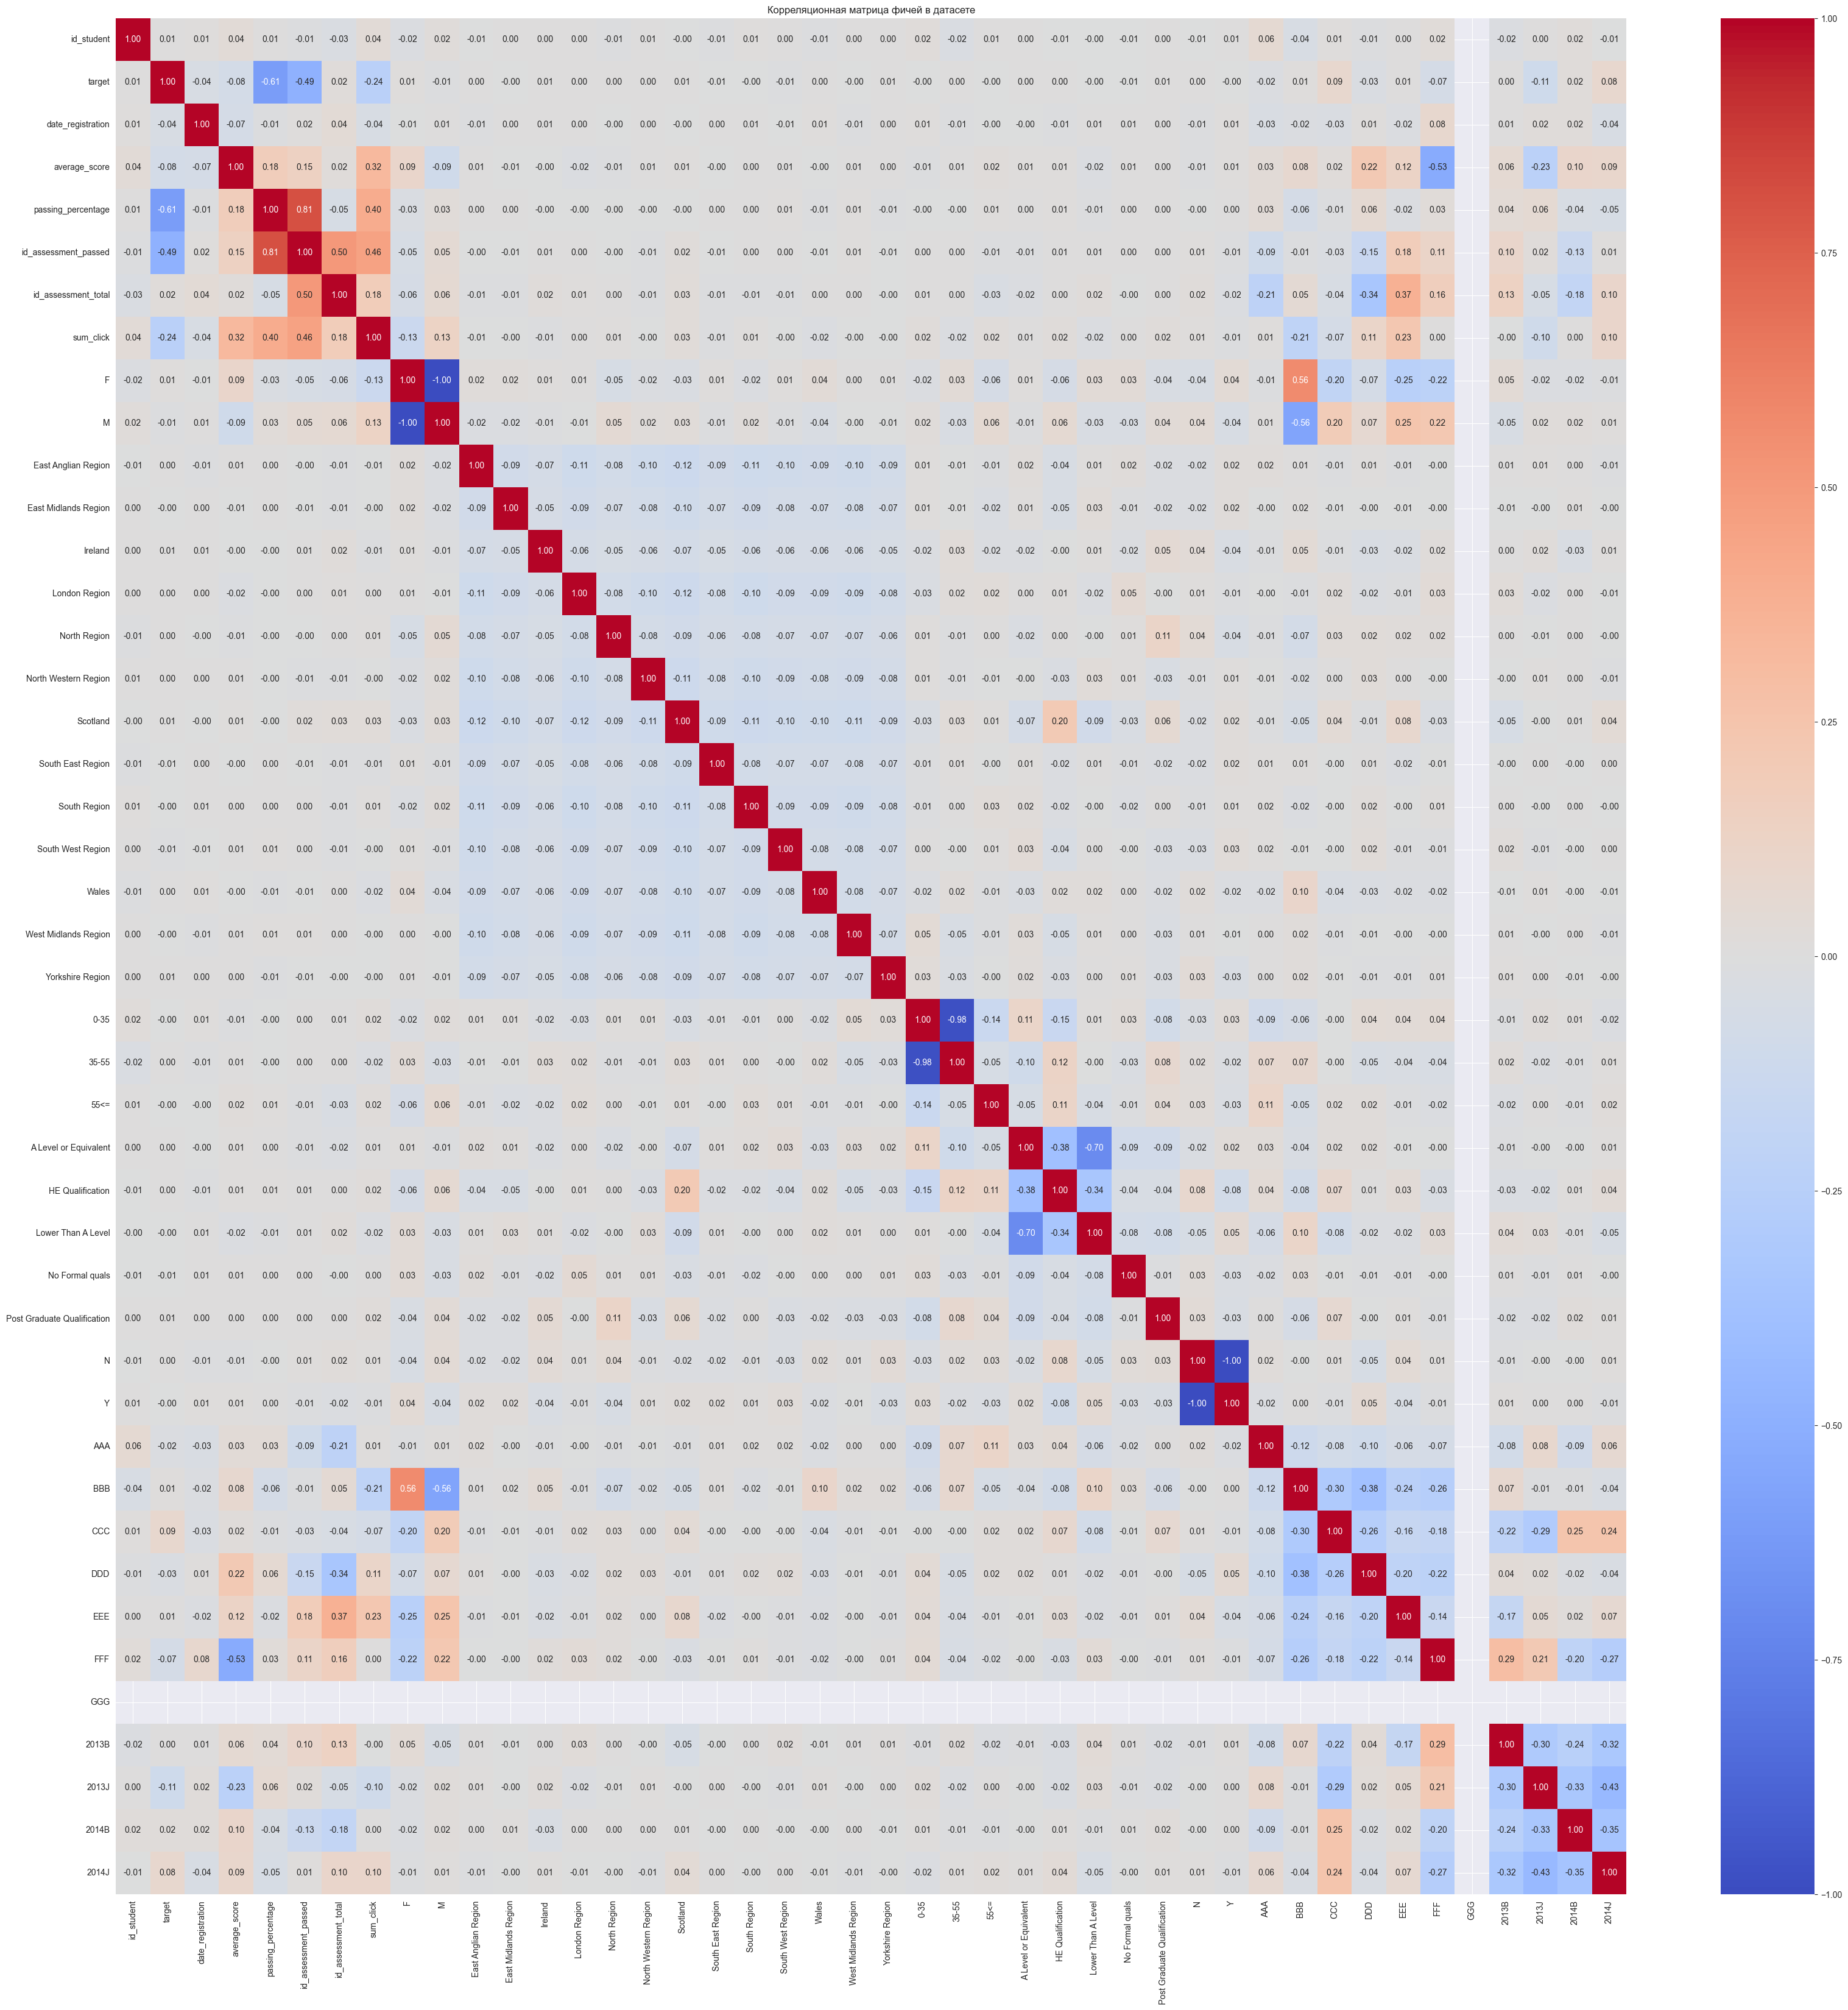

In [19]:
correlation_matrix = YX.corr()

# Построение тепловой карты с помощью seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица фичей в датасете')
plt.show()

In [20]:
X = result.iloc[:, 2:]
Y = result.iloc[:, 1]
Y
print(X)
print(Y)

       date_registration  average_score  passing_percentage  \
0                 -159.0           82.4           83.333333   
1                  -53.0           65.4           83.333333   
2                  -52.0           76.3           83.333333   
3                 -176.0           55.0           83.333333   
4                 -110.0           66.9           83.333333   
...                  ...            ...                 ...   
25749              -23.0           -1.0           90.000000   
25750              -23.0           -1.0           90.000000   
25751             -129.0           -1.0           90.000000   
25752              -49.0           -1.0           20.000000   
25753              -28.0           -1.0           70.000000   

       id_assessment_passed  id_assessment_total  sum_click    F    M  \
0                         5                    6        836  0.0  1.0   
1                         5                    6       1220  1.0  0.0   
2                       

In [21]:
# Выводим результат
result

,id_student,target,date_registration,average_score,passing_percentage,id_assessment_passed,id_assessment_total,sum_click,F,M,...,BBB,CCC,DDD,EEE,FFF,GGG,2013B,2013J,2014B,2014J
0,11391,0.0,-159.0,82.4,83.333333,5,6,836,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28400,0.0,-53.0,65.4,83.333333,5,6,1220,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31604,0.0,-52.0,76.3,83.333333,5,6,1989,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,32885,0.0,-176.0,55.0,83.333333,5,6,739,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38053,0.0,-110.0,66.9,83.333333,5,6,2168,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25749,2620947,0.0,-23.0,-1.0,90.000000,9,10,469,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25750,2645731,0.0,-23.0,-1.0,90.000000,9,10,893,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25751,2648187,0.0,-129.0,-1.0,90.000000,9,10,297,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25752,2679821,1.0,-49.0,-1.0,20.000000,2,10,210,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
result = result.dropna()
result = result.drop(columns = ['id_assessment_passed', 'id_assessment_total'])

In [72]:
result.shape

(3543, 42)

In [24]:
print(len(result))
np.random.seed(42)
indices = np.arange(len(result))
np.random.shuffle(indices)
train_size = int(0.8 * len(result))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

25753


In [64]:
!pip3 install scikit-learn --break-system-packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score


def accuracy(df, model, dropped_columns, alpha):
    indices = np.arange(len(result))
    np.random.shuffle(indices)
    train_size = int(alpha * len(result))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X = df.drop(columns=dropped_columns + ['target'])
    y = df['target']
    X_train = X.iloc[train_indices]
    y_train = y.iloc[train_indices]
    X_eval = X.iloc[test_indices]
    y_eval = y.iloc[test_indices]
    tree_classifier = model
    tree_classifier.fit(X_train, y_train)
    y_pred = tree_classifier.predict(X_eval)
    # precision = precision_score(y_eval, y_pred)
    # recall = recall_score(y_eval, y_pred)
    # print(f"{precision = :.2f}")
    # print(f"{recall = :.2f}")
    predicted_probabilities = model.predict_proba(X_eval)[:, 1]
    roc_auc = roc_auc_score(y_eval, predicted_probabilities)
    # print(f"{roc_auc = :.2f}")
    return accuracy_score(y_eval, y_pred), roc_auc

def feature_importance(df, model, dropped_columns):
    X = df.drop(columns=dropped_columns + ['target'] )
    y = df['target']
    X_train = X.iloc[train_indices]
    y_train = y.iloc[train_indices]
    X_eval = X.iloc[test_indices]
    y_eval = y.iloc[test_indices]

    tree_classifier = model
    tree_classifier.fit(X_train, y_train)
    # Важность признаков
    feature_importance = tree_classifier.feature_importances_

    # Создание DataFrame с важностью признаков
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

    # Сортировка по важности
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Вывод на экран
    print(feature_importance_df)
    


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


print(accuracy(result, GradientBoostingClassifier(), ['id_student'], 0.8), "Gradient boosting")
print(accuracy(result, LogisticRegression(max_iter=10000, verbose=False), ['id_student'], 0.8), "Logistic regression")
print(accuracy(result, RandomForestClassifier(), ['id_student'], 0.8), "RandomForestClassifier")

roc_auc = 0.53
(0.8222849083215797, 0.532378324844369) Gradient boosting
roc_auc = 0.59
(0.7926657263751763, 0.5900573752632725) Logistic regression
roc_auc = 0.60
(0.8166431593794076, 0.5950022999702358) RandomForestClassifier


In [135]:
result = dateAccuracy(30, 50)
n_samples = result.shape[0]
class_balance = result['target'].mean()
print(f"{n_samples = :.2f}")
print(f"{class_balance = :.2f}")

n_samples = 3543.00
class_balance = 0.12


In [133]:
roc_aucs = []
for i in range(10):
    # accuracy_result, roc_auc = accuracy(result, RandomForestClassifier(
    #     n_estimators=50,
    #     max_features=10,
    #     min_samples_leaf= 10
    #     ),['id_student'], 0.7)
    accuracy_result, roc_auc = accuracy(result, LogisticRegression(max_iter=10000, verbose=False), ['id_student'], 0.8)
    roc_aucs.append(roc_auc)
mean = np.mean(roc_aucs)
std = np.std(roc_aucs)
print(f"roc_auc = {mean  :.3f} +- {std :.3f}")

roc_auc = 0.580 +- 0.021


In [27]:
feature_importance(result, GradientBoostingClassifier(), ['id_student'])

                        Feature  Importance
2            passing_percentage    0.886711
1                 average_score    0.027584
3                     sum_click    0.026605
0             date_registration    0.016748
37                        2013J    0.011320
31                          CCC    0.007696
30                          BBB    0.004678
32                          DDD    0.003549
34                          FFF    0.002910
33                          EEE    0.002406
29                          AAA    0.001758
39                        2014J    0.001309
36                        2013B    0.000988
4                             F    0.000838
5                             M    0.000639
38                        2014B    0.000597
13            South East Region    0.000454
7          East Midlands Region    0.000428
22        A Level or Equivalent    0.000404
12                     Scotland    0.000295
6           East Anglian Region    0.000245
10                 North Region 

In [28]:
feature_importance(result, RandomForestClassifier(), ['id_student'])

                        Feature  Importance
2            passing_percentage    0.356207
3                     sum_click    0.160916
1                 average_score    0.114266
0             date_registration    0.099363
22        A Level or Equivalent    0.013365
24           Lower Than A Level    0.012822
19                         0-35    0.011219
20                        35-55    0.010969
37                        2013J    0.010408
12                     Scotland    0.009759
39                        2014J    0.009533
9                 London Region    0.009492
6           East Anglian Region    0.009469
5                             M    0.009144
14                 South Region    0.009135
11         North Western Region    0.009052
4                             F    0.009004
23             HE Qualification    0.008885
30                          BBB    0.008719
32                          DDD    0.008356
17         West Midlands Region    0.008168
31                          CCC 

0.5905334335086401
0.17169069462647443
0.5812174977057204
0.4152097902097902
0.5462184873949579
0.5106940200785683
0.6022520886305848
0.36584289496910855
0.5869761153672826
0.5751821594170898
0.581964851627773
0.44631020768890856
0.5876187356698329
0.4011627906976744
0.5855210819411297
0.49132176234979974
0.5768292682926829
0.636037651277454
0.6118251928020566
0.4292155094679892
0.5974238875878221
0.5745495495495495
0.5922651933701657
0.605376101197199
0.5856025882987328
0.49611694837825493
0.5991044072590148
0.581959706959707
0.5829092451229856
0.6284865112025606
0.6271304347826087
0.4164934164934165
0.592289156626506
0.5683236994219654
0.6045314109165808
0.5379152348224513
0.6092561983471074
0.4264229523368811
0.5964818763326226
0.5203441060218554
0.5876034907138062
0.6109818520241973
0.6062882582081246
0.5121034077555817
0.6008726899383984
0.5485004686035614
0.5847121883010953
0.5899365154008935
0.6105854523950325
0.4934289127837515
0.5945602440264361
0.5589008363201912
0.5930886686

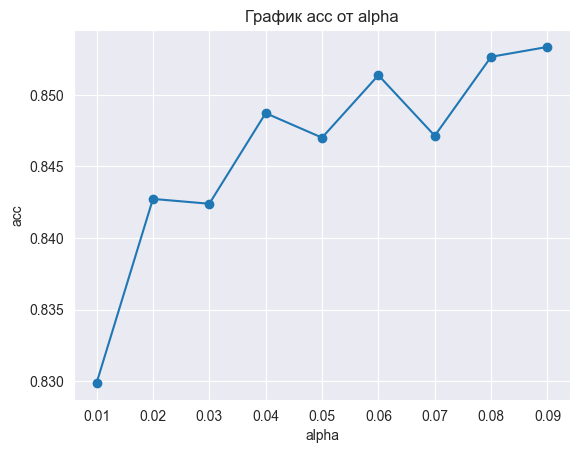

In [29]:
#график accuracy от alpha
alpha_values = []
acc_for_values = []
acc_log_values = []
acc_grad_values = []


for i in range(1, 10, 1):
    alpha_values.append(i / 100)
    acc_for_values.append(accuracy(result, RandomForestClassifier(), ['id_student'], i / 100))
    acc_log_values.append(accuracy(result, LogisticRegression(max_iter=10000, verbose=False), ['id_student'], i / 100))
    acc_grad_values.append(accuracy(result, GradientBoostingClassifier(), ['id_student'], i / 100))
    

plt.plot(alpha_values, acc_for_values, marker='o', linestyle='-')
plt.title('График acc от alpha')
plt.xlabel('alpha')
plt.ylabel('acc') 
plt.grid(True)
plt.show()

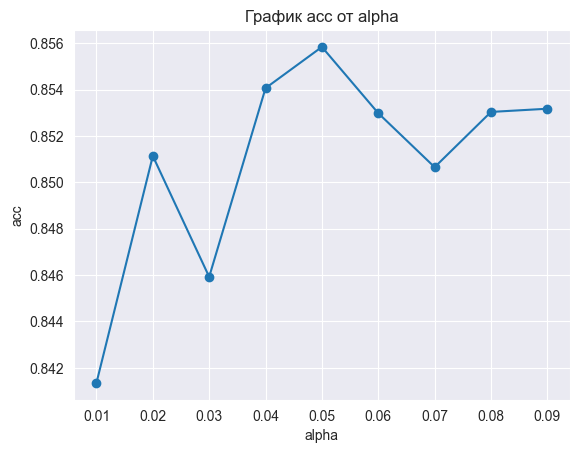

In [30]:
plt.plot(alpha_values, acc_log_values, marker='o', linestyle='-')
plt.title('График acc от alpha')
plt.xlabel('alpha')
plt.ylabel('acc') 
plt.grid(True)
plt.show()

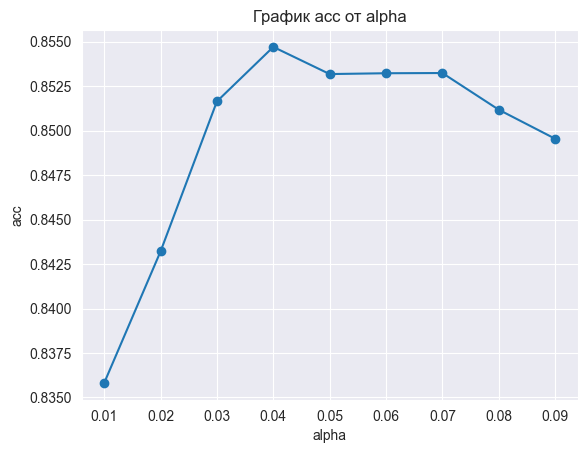

In [31]:
plt.plot(alpha_values, acc_grad_values, marker='o', linestyle='-')
plt.title('График acc от alpha')
plt.xlabel('alpha')
plt.ylabel('acc') 
plt.grid(True)
plt.show()

In [34]:
print(acc_for_values)

[0.8298948854722309, 0.842737142404311, 0.8424002241703695, 0.8487238603729321, 0.847012180168397, 0.8513714474553866, 0.8471462569412551, 0.852656902882708, 0.8533452807646356]


In [59]:
def dateAccuracy(date1: int, date2: int):
    sr = pd.read_csv('studentRegistration.csv')
    sr["module_student"] = sr.code_module + sr.code_presentation + sr.id_student.astype(str)
    sr = sr[~(sr.date_unregistration < 0)]
    sr["target"] = 0.0
    student_assessments = SA[SA["date_submitted"] < date1]
    merged_df_time = pd.merge(student_assessments, assessments, on='id_assessment')
    merged_df_time = merged_df_time[merged_df_time["date"] < date1]

    merged_df_time['weighted_score'] = merged_df_time['score'] * merged_df_time['weight']

    # Группируем по нужным полям и суммируем взвешенные оценки и веса
    grouped = merged_df_time.groupby(['id_student', 'code_module', 'code_presentation'])
    weighted_scores = grouped['weighted_score'].sum()
    total_weights = grouped['weight'].sum()

    # Рассчитываем средневзвешенную оценку
    average_scores = weighted_scores / total_weights
    average_scores = average_scores.reset_index()
    average_scores.rename(columns={0: 'average_score'}, inplace=True)

    # Шаг 3: Объединяем с XY
    result = pd.merge(sr, average_scores, on=['id_student', 'code_module', 'code_presentation'], how='left')

    # Шаг 4: Заполняем отсутствующие значения (-1)
    result = result.fillna({'average_score': -1})
    
    vle_new = pd.read_csv('studentVle.csv')
    vle_filtered = vle_new[vle_new['date'] < date1]
    vle_filtered = vle_filtered.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index()
    
    passed_assessments_count = merged_df_time.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].count().reset_index()

    # Подсчет общего количества ассесментов для каждого студента и курса
    total_assessments_count = assessments[assessments["date"] < date1].groupby(['code_module', 'code_presentation'])['id_assessment'].count().reset_index()
    
    # Слияние таблиц с количеством сданных и общим количеством ассесментов
    result_df = pd.merge(passed_assessments_count, total_assessments_count, on=['code_module', 'code_presentation'], suffixes=('_passed', '_total'))
    
    # Вычисление процента сданных ассесментов
    result_df['passing_percentage'] = (result_df['id_assessment_passed'] / result_df['id_assessment_total']) * 100
    
    merged_df = pd.merge(result, result_df, on=['id_student', 'code_module', 'code_presentation'])
    
    
    merged_df = pd.merge(merged_df, vle_filtered, on=['id_student', 'code_module', 'code_presentation'])
    
    YX = merged_df[["id_student","date_registration", "average_score", "passing_percentage", "id_assessment_passed", "id_assessment_total", "sum_click", "date_unregistration"]]
    for col in ["gender", "region", "age_band", "highest_education", "disability", "code_module", "code_presentation"]:
        df = pd.get_dummies(SI[col], dtype=np.float32)
        YX = pd.merge(YX, df, left_index=True, right_index=True)
    result = YX.copy()
    result = result.fillna({'date_unregistration': 0})
    result = result[result["date_unregistration"]> date1]
    
    result['target'] = 0
    result.loc[(result['date_unregistration'] > date1) & (result['date_unregistration'] < date2), 'target'] = 1
    
    result.drop(columns=['date_unregistration'], inplace=True)
    result.drop(columns=['id_assessment_passed'], inplace=True)
    result.drop(columns=['id_assessment_total'], inplace=True)

    return result
    
    

In [40]:
dateAccuracy(30, 60)

,id_student,date_registration,average_score,passing_percentage,sum_click,F,M,East Anglian Region,East Midlands Region,Ireland,...,CCC,DDD,EEE,FFF,GGG,2013B,2013J,2014B,2014J,target
14,65002,-180.0,66.0,100.0,94,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
21,94961,-170.0,74.0,100.0,290,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
38,129955,-197.0,85.0,100.0,368,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
41,135400,-32.0,72.0,100.0,204,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
49,148993,-174.0,68.0,100.0,787,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20362,2449490,-112.0,66.0,100.0,367,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
20382,2550534,-25.0,82.0,100.0,598,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
20403,2678580,-37.0,74.0,100.0,227,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
20407,2686035,-30.0,90.0,100.0,538,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [55]:
t1 = time.time()
result = dateAccuracy(30, 60)
t2 = time.time()
print(f"{t2-t1 = :.2f}")
n_samples = result.shape[0]
class_balance = result['target'].mean()
print(f"{n_samples = :.2f}")
print(f"{class_balance = :.2f}")
# print(accuracy(result, GradientBoostingClassifier(), ['id_student'], 0.8), "Gradient boosting")
# print(accuracy(result, LogisticRegression(max_iter=10000, verbose=False), ['id_student'], 0.8), "Logistic regression")
print(accuracy(result, RandomForestClassifier(n_estimators= 100), ['id_student'], 0.8), "RandomForestClassifier")
t3 = time.time()
print(f"{t3-t2 = :.2f}")

t2-t1 = 3.24
n_samples = 3543.00
class_balance = 0.18
roc_auc = 0.57
0.7842031029619182 RandomForestClassifier
t3-t2 = 0.23


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


for i in range(20, 200, 5):
    for j in range(i + 15, 200, 5):
        print(i)
        print(j)
        result = dateAccuracy(30, 30)
        true_labels = result["target"]
        print(accuracy(result, GradientBoostingClassifier(), ['id_student'], 0.8), "Gradient boosting")
        print(accuracy(result, LogisticRegression(max_iter=10000, verbose=False), ['id_student'], 0.8), "Logistic regression")
        print(accuracy(result, RandomForestClassifier(), ['id_student'], 0.8), "RandomForestClassifier")

20
35


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.